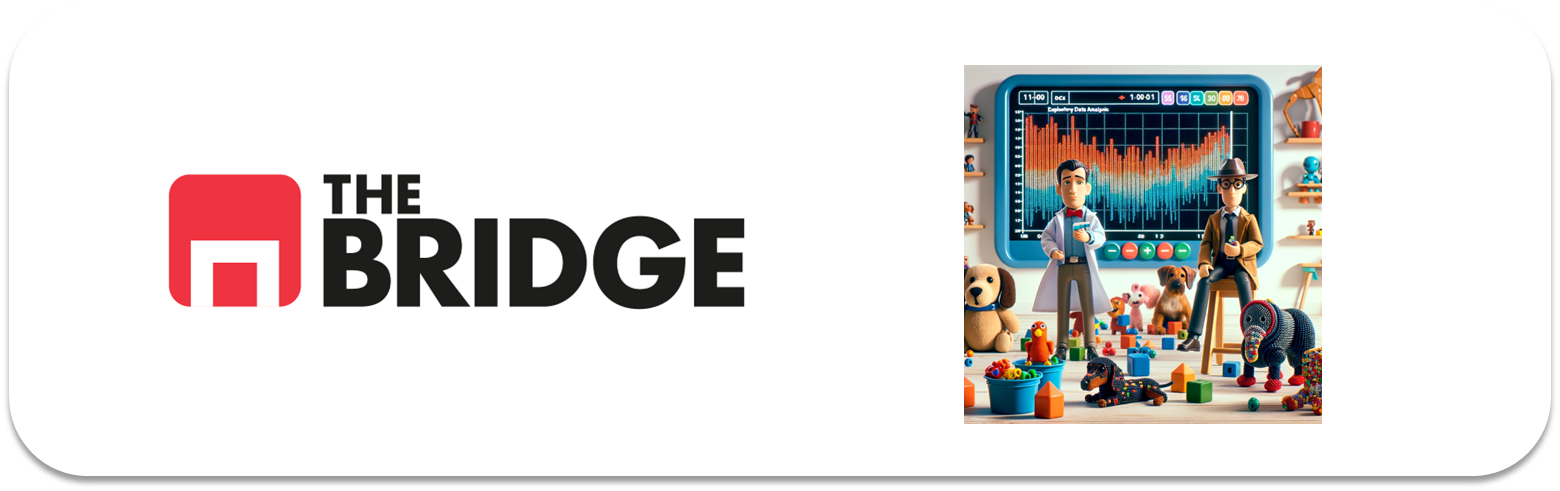

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [24]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [25]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [26]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace=True)

In [27]:
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [28]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False,1


In [29]:
df_titanic.drop(columns=["parch","sibsp"], inplace=True)
df_titanic.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [31]:
df_titanic.loc[df_titanic["embark_town"].isna(),"embark_town"] = df_titanic["embark_town"].mode()[0]

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [32]:
df_titanic["age"] = df_titanic.groupby("who")["age"].transform(
    lambda x: x.fillna(x.mean())
)

In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

*Se puede observas claramente que el hombre fue el que menos sobrevivio.

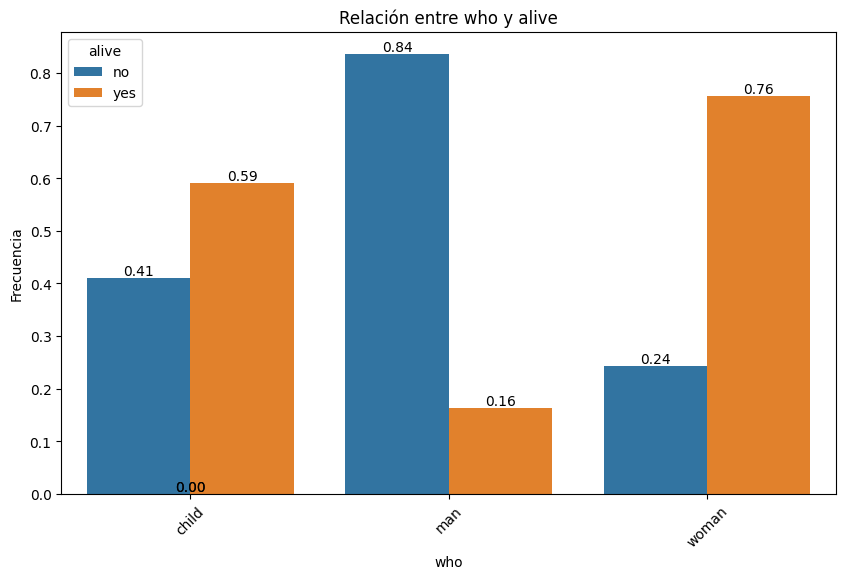

In [80]:
plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq= True, show_values= True)

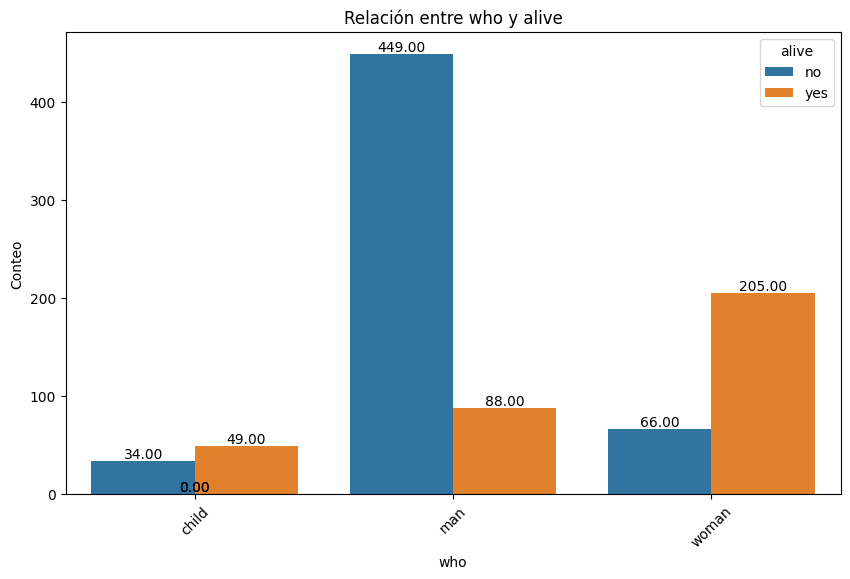

In [81]:
plot_categorical_relationship_fin(df_titanic,"who","alive", show_values= True)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

* En terminos absolutos sobrevivieron mas pasajeros de la clase primera.
* En terminos relativos tambien el porcentaje mas grande de sobrevientes fue en primera clasem

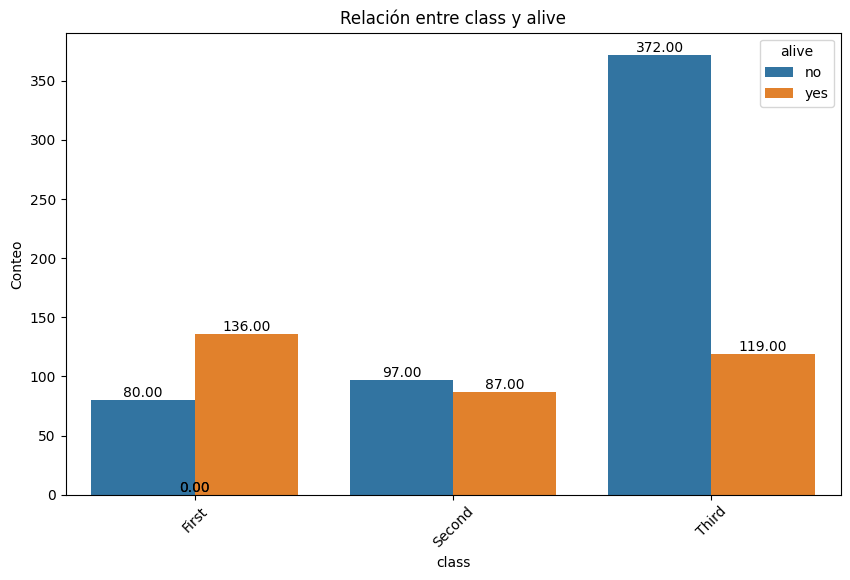

In [35]:
plot_categorical_relationship_fin(df_titanic,"class","alive", show_values= True)

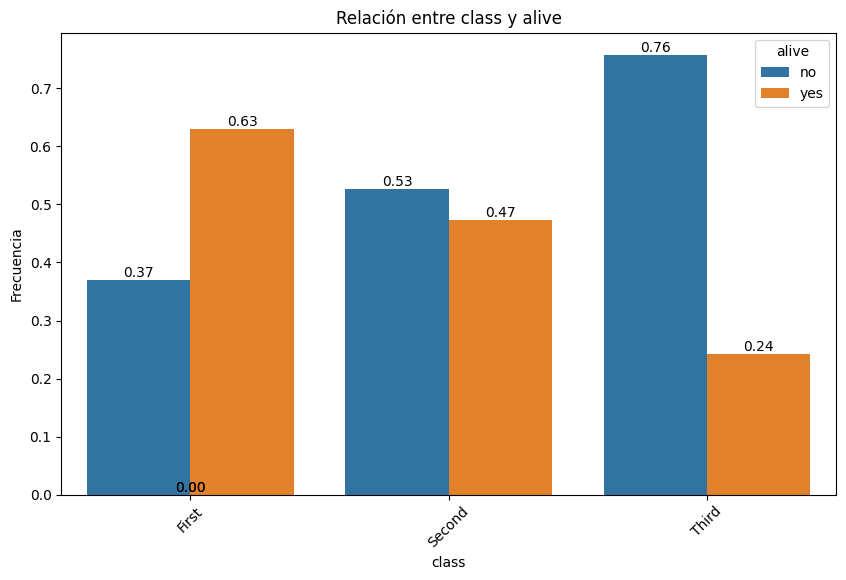

In [36]:
plot_categorical_relationship_fin(df_titanic,"class","alive", relative_freq= True, show_values= True)

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

* Sobrevivieron mas personas que embarcaron en Southamton pero porcentualemente sobrevivieorn mas en Cherbourg

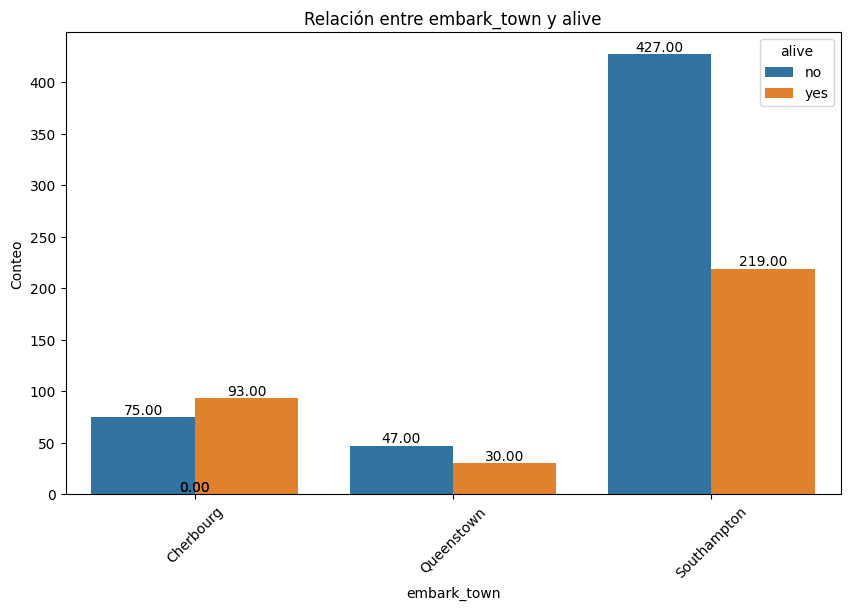

In [37]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", show_values= True)

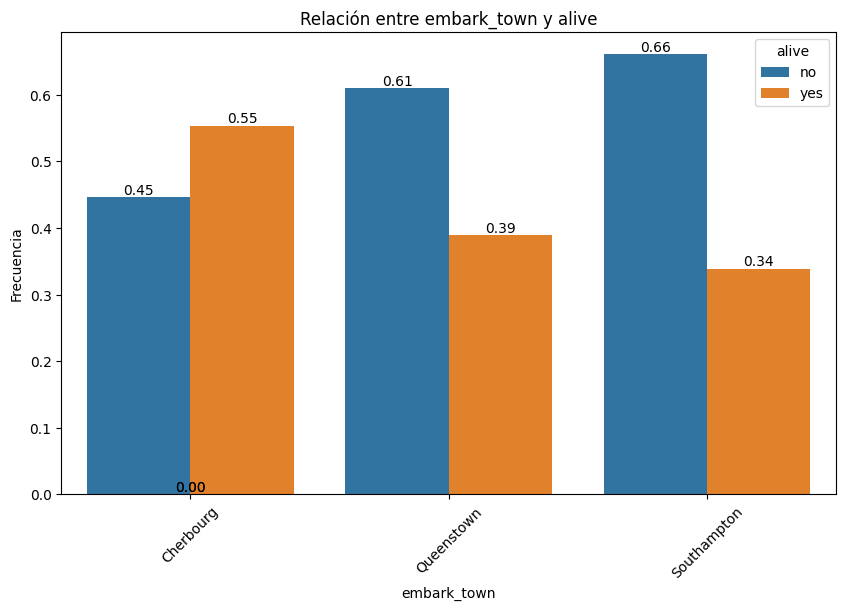

In [38]:
plot_categorical_relationship_fin(df_titanic,"embark_town","alive", relative_freq=True, show_values= True)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

* No no hay alguna relacion, la supervivencia no depende de lo que se pago, si se puede observar que hubo pasajeros que no pagaron nada.

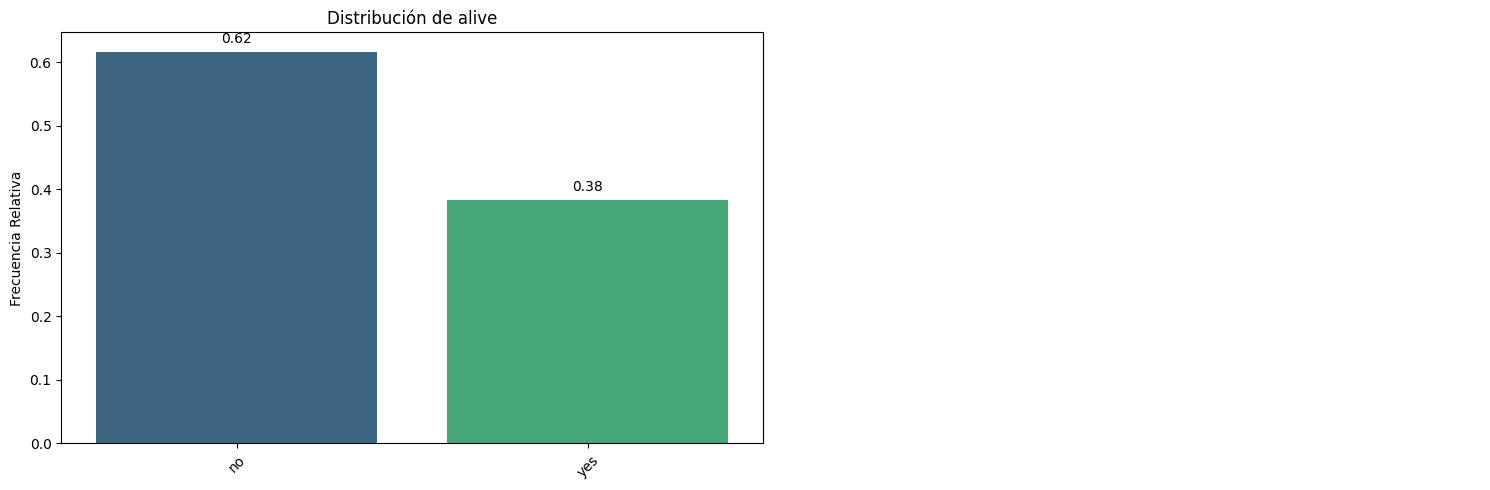

In [42]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

(2,)


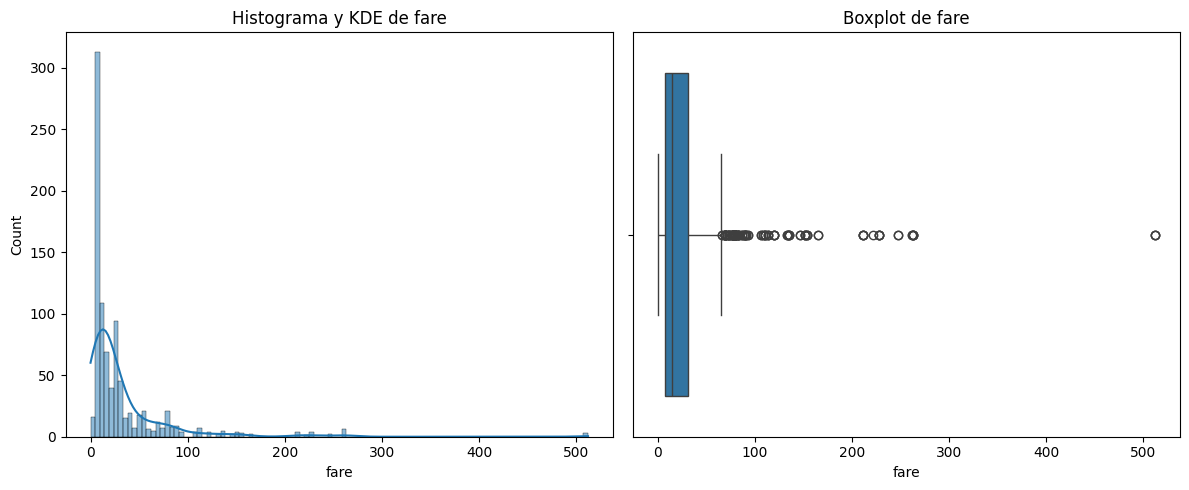

In [43]:
plot_combined_graphs(df_titanic,["fare"])

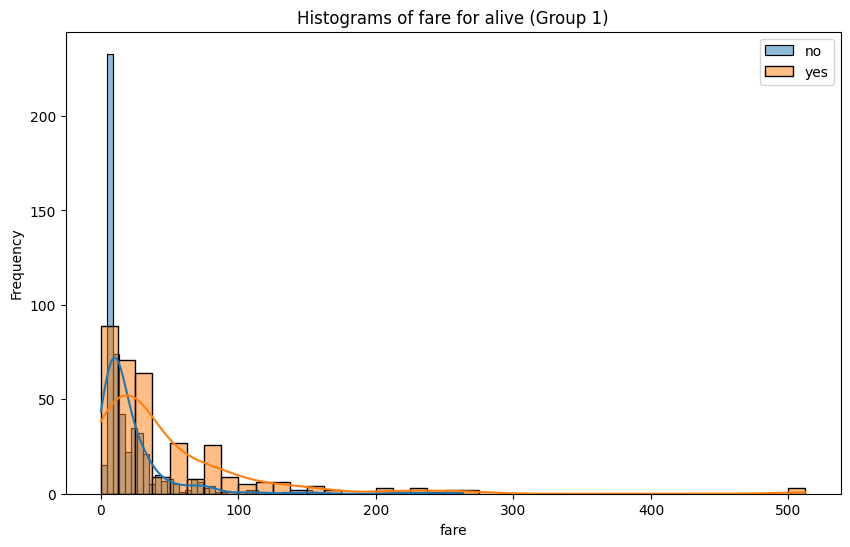

In [40]:
plot_grouped_histograms(df_titanic, "alive","fare",group_size= 2)

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [48]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [64]:
df_titanic.groupby(["embark_town", "alive"])["fare"].mean().unstack()

alive,no,yes
embark_town,,
Cherbourg,35.443335,79.720926
Queenstown,13.335904,13.182227
Southampton,20.743987,39.916514


In [59]:
columnas = ["alive","fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


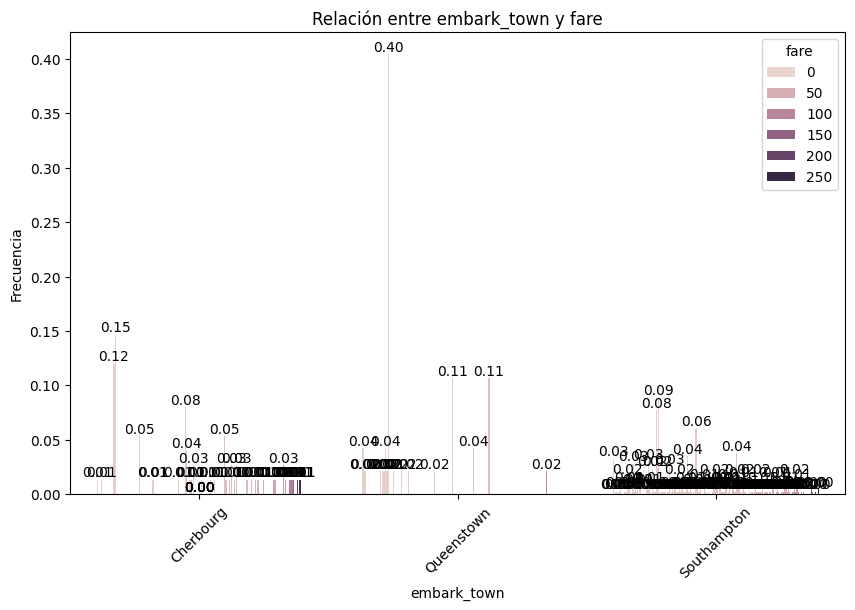

Respuesta yes:


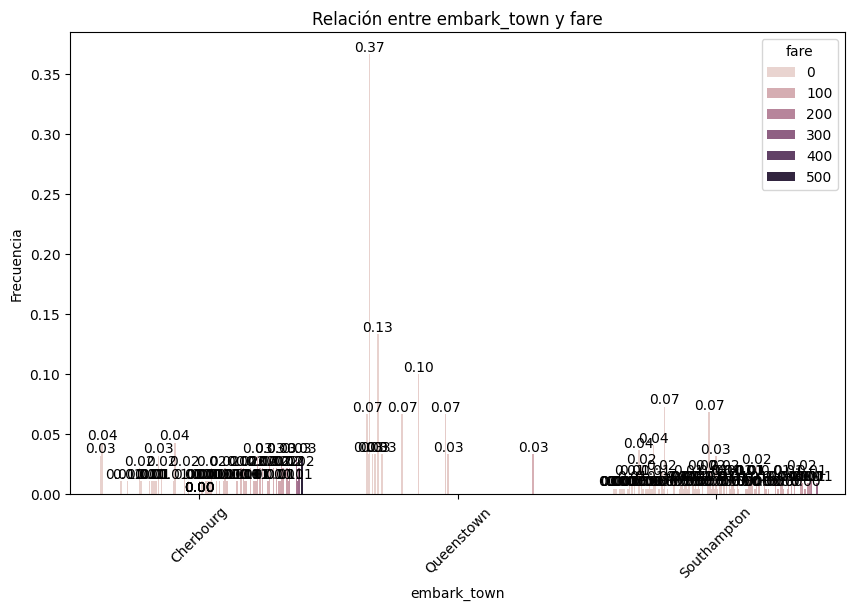

In [60]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

* TabAir es la aerolinea que mas vuelos tiene pero la que menos ingresos genera

In [65]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [66]:
df_air_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [67]:
df_air_jun.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23


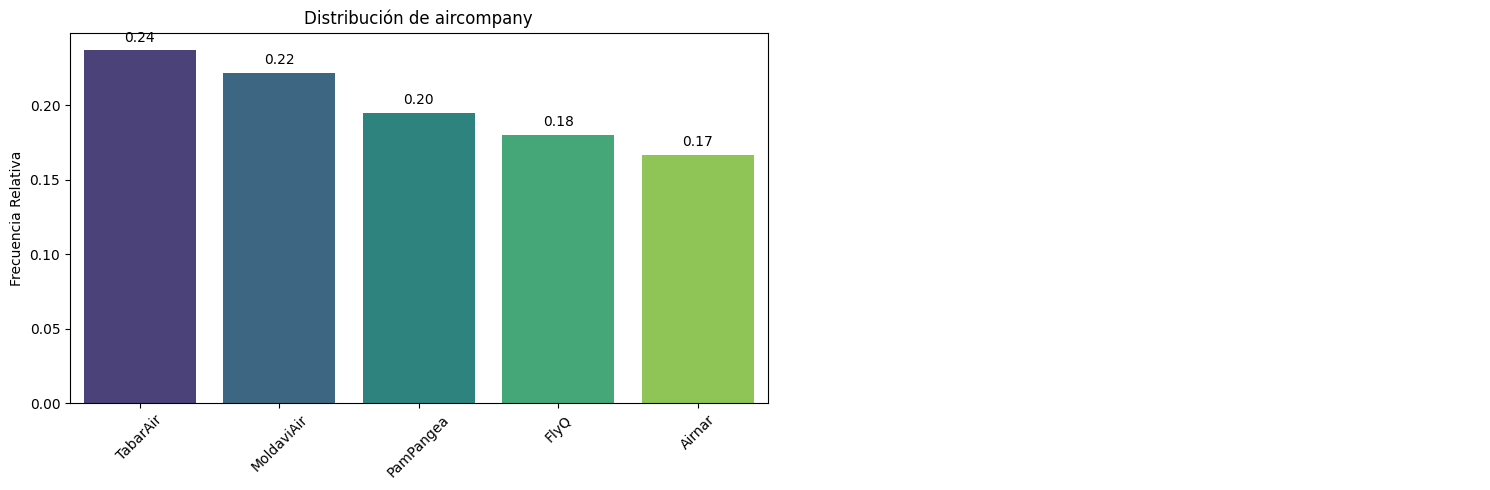

In [68]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


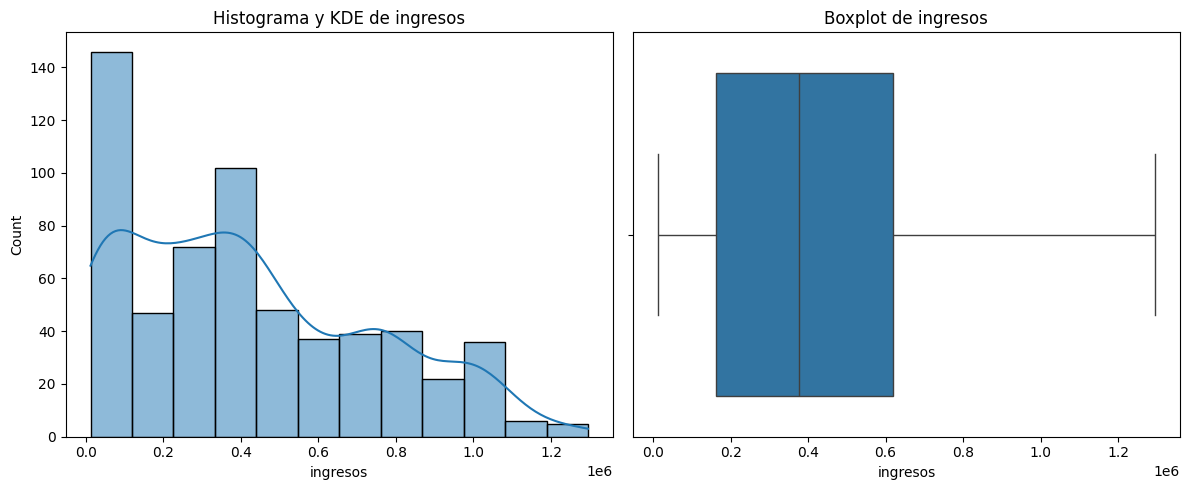

In [69]:
plot_combined_graphs(df_air_jun,["ingresos"])

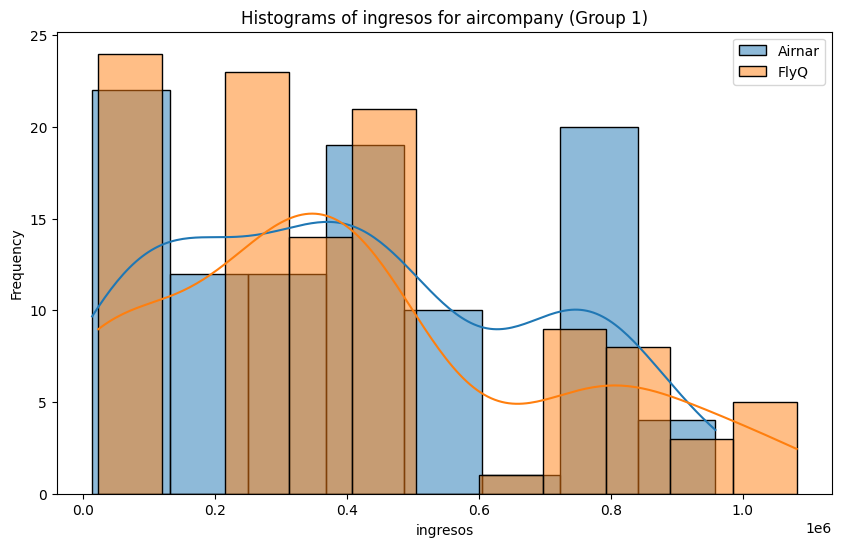

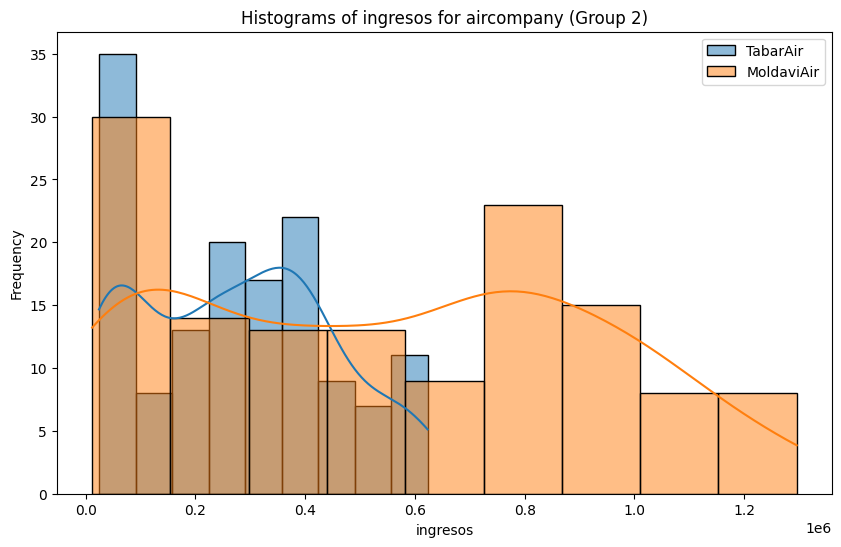

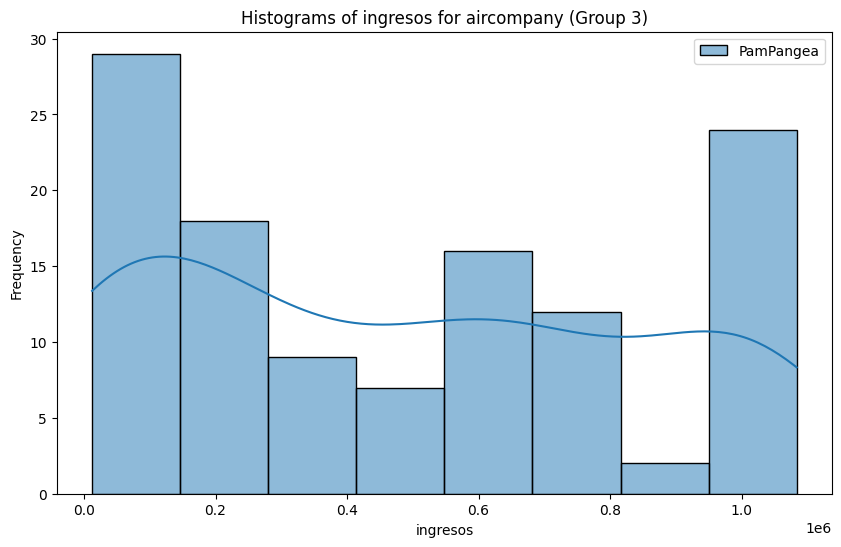

In [70]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos",2)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

* Hay una linea de vuelos mas eficiente que las otras, por el consumo y el tamaño de las burbujas.

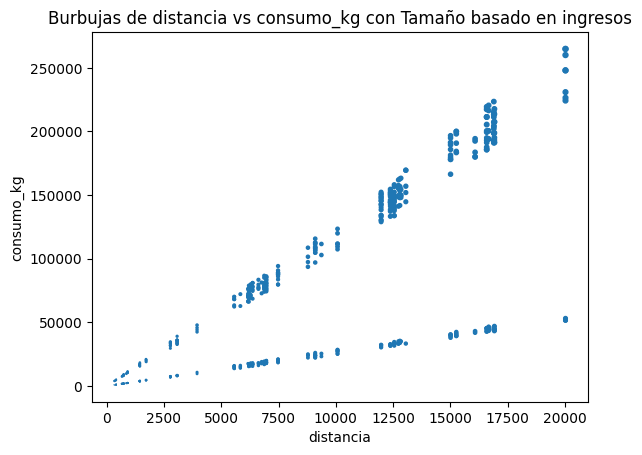

In [71]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

* Hay una correlación ente ingresos y consumos, pero el hecho de que haya realmente dos rectas nos habla de que los vuelos cortos son más eficientes que los largos

In [74]:
df_air_jun["distancia"].describe() 

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [75]:
bins = [0, 3073, 6877, 12553, 20029]
labels = ["corto", "medio", "largo", "muy_largo"]

df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], bins=bins, labels=labels, include_lowest=True)

In [76]:
df_air_jun.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corto
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,muy_largo
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,largo
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,medio
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,largo
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,muy_largo
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,corto
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,muy_largo
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23,muy_largo
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,corto


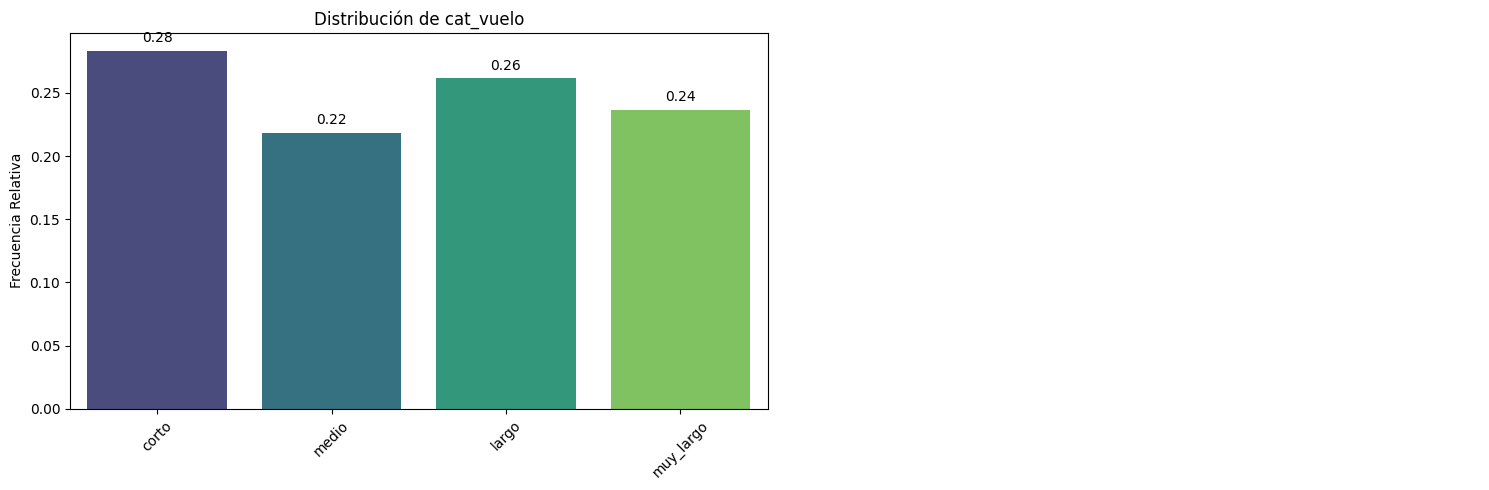

In [79]:
pinta_distribucion_categoricas(df_air_jun,["cat_vuelo"], relativa= True, mostrar_valores= True)

In [77]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_air_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_air_jun.loc[df_air_jun[col_directora] == valor,[col_2,col_1]]

Respuesta corto:


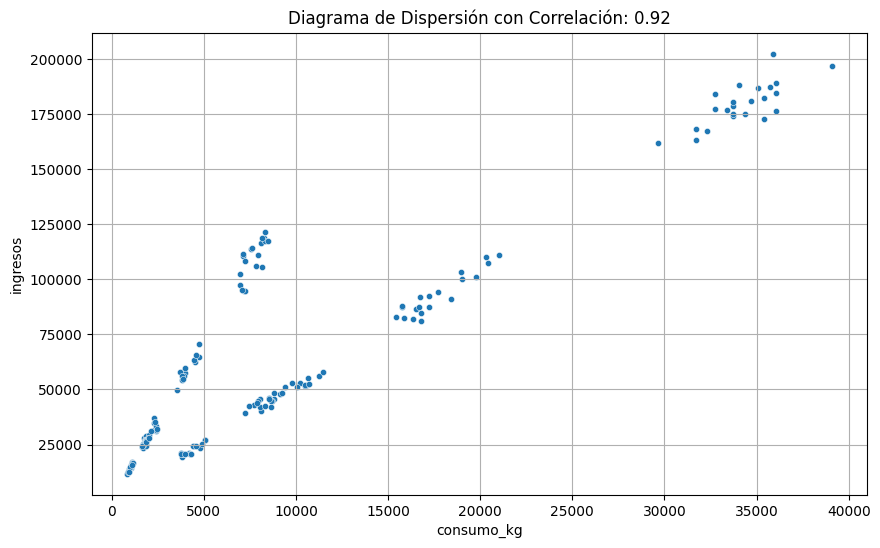

Respuesta muy_largo:


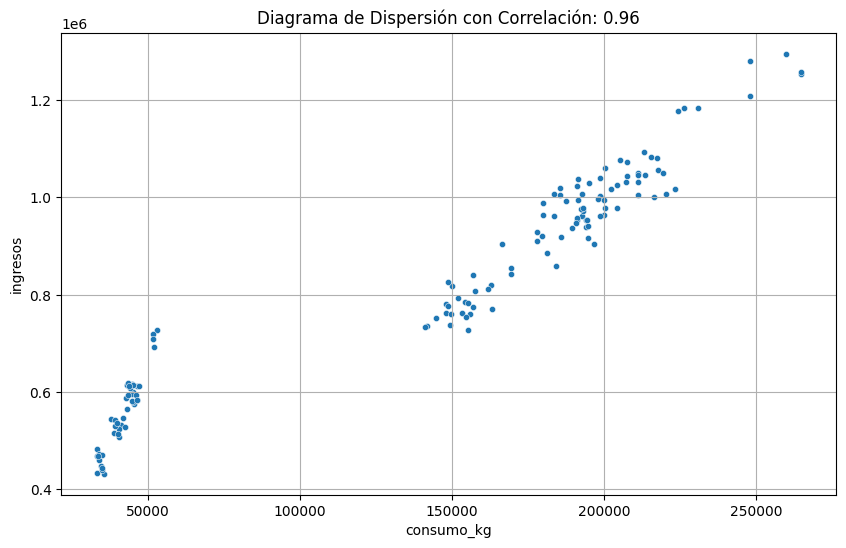

Respuesta largo:


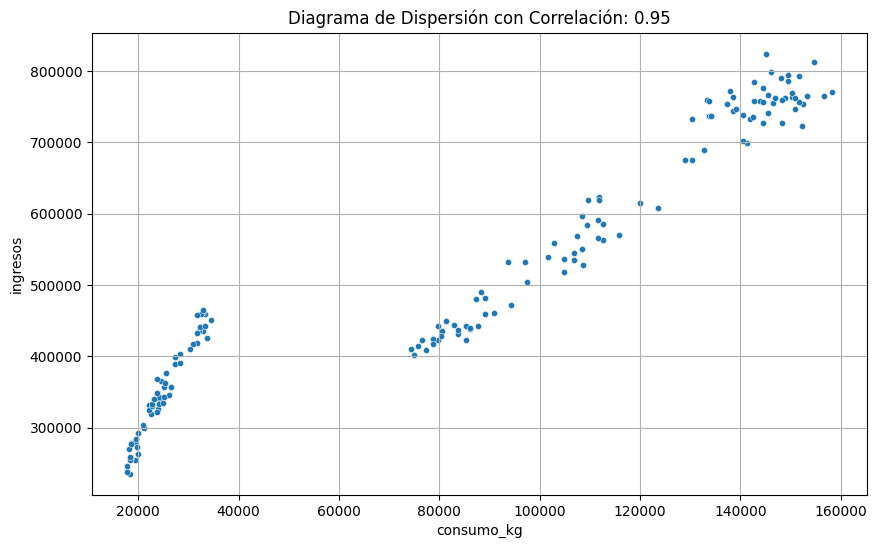

Respuesta medio:


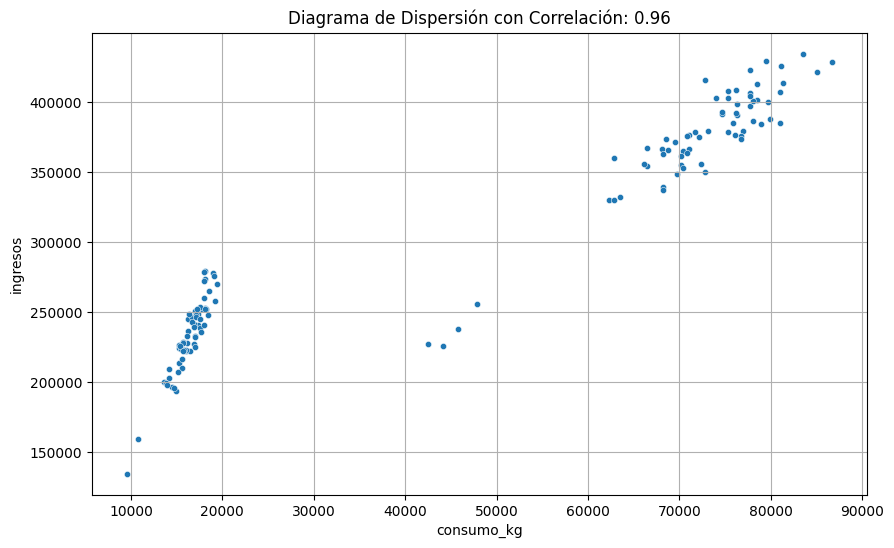

In [78]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.